<h1>Logistic Regression - Youssef Hassan<h1>

<h2>Imports<h2>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


<h2>Data Exploration and Preparation<h2>

In [15]:
X,y = make_circles(n_samples=20000, noise=0.1, factor=0.4, random_state=42)
y = y.reshape(-1)

In [16]:
# Adding the bias column

X= np.hstack((np.ones((X.shape[0], 1)), X))

# Squaring x1 and x2 
x1_squared = (X[:, 1] ** 2).reshape(-1, 1)
x2_squared = (X[:, 2] ** 2).reshape(-1, 1)

# making their interaction column
x1_times_x2 = (X[:, 1] * X[:, 2]).reshape(-1, 1)

# adding the columns in the order x1_squared, x1_times_x2, x2_squared
X = np.hstack((X, x1_squared))
X = np.hstack((X, x1_times_x2))
X = np.hstack((X, x2_squared))

In [17]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("First 5 examples of X:\n", X[:5])
print("First 5 labels:\n", y[:5])

Shape of X: (20000, 6)
Shape of y: (20000,)
First 5 examples of X:
 [[ 1.          0.34963522  0.04731161  0.12224479  0.0165418   0.00223839]
 [ 1.          0.24359506  0.94263203  0.05933856  0.22962051  0.88855514]
 [ 1.          0.53789301 -0.63389047  0.28932889 -0.34096526  0.40181713]
 [ 1.          0.82178506  0.5393179   0.67533068  0.44320339  0.2908638 ]
 [ 1.         -0.486447    0.32636728  0.23663068 -0.15876038  0.1065156 ]]
First 5 labels:
 [1 0 0 0 1]


<h2>Implementation<h2>

In [18]:
def my_sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

In [19]:
def my_loss_function(y, y_pred):
    return np.mean(-(y*np.log(y_pred)) - ((1-y)*np.log(1 - y_pred)))

In [20]:
def my_gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, theta, learning_rate, epochs, patience):
    '''

    For the gradient descent function, I chose to make it with an early stopping function. Based on my previous experience with Machine Learning,
    early stopping usually speeds up processing time and results in an acceptable theta without wasting processing time.
    '''
    
    m = X_train.shape[0]

    # Variables used for early_stopping
    best_theta = theta
    best_loss = float('inf')
    patience_counter = 0
    loss_history = []

    for epoch in range(epochs):
        Y_pred = my_sigmoid_func(np.dot(X_train, np.transpose(theta)))
        
        train_loss = my_loss_function(y_train, Y_pred)

        theta = theta - learning_rate * np.dot(np.transpose(X_train), (Y_pred - y_train)) / m 


        #validation loss is calculated to check if the gradient descent should stop here
        val_predictions = my_sigmoid_func(np.dot(X_val, theta))
        
        val_loss = my_loss_function(y_val, val_predictions)
        
        loss_history.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


        #I check if the val_loss is better than our best loss, if not the patience_counter is increased
        if val_loss < best_loss:
            best_loss = val_loss
            best_theta = theta.copy()
            patience_counter = 0  
        else:
            patience_counter += 1


        #if we reach the specified patience, gradient descent is stopped
        if patience_counter >= patience:
            print("Early stopping triggered")
            break
    
    return best_theta, best_loss


In [21]:
def my_train_val_test_split(X, y, train_size = 0.6, val_size = 0.2, test_size= 0.2, seed = None):
    
    # check if ratios don't add up
    if(train_size + val_size + test_size != 1):
        raise ValueError
    
    # to randomize
    if(seed != None):
        np.random.seed(seed)
    
    shuffled_indices = np.random.permutation(X.shape[0])

    # determining how many data points per train/val/test subset

    end_of_train = int(train_size * X.shape[0])
    end_of_val = end_of_train + int(val_size * X.shape[0])

    # splitting indicies for each subset
    training_indicies = shuffled_indices[:end_of_train]
    validation_indicies = shuffled_indices[end_of_train: end_of_val]
    testing_indicies = shuffled_indices[end_of_val:]

    #splitting data into train/val/test
    X_train, y_train = X[training_indicies], y[training_indicies]
    X_val, y_val =  X[validation_indicies], y[validation_indicies]
    X_test, y_test = X[testing_indicies], y[testing_indicies]

    return X_train, X_val, X_test, y_train, y_val, y_test




In [22]:
X_train, X_val, X_test, y_train, y_val, y_test= my_train_val_test_split(X, y, train_size = 0.6, val_size = 0.2, test_size= 0.2, seed = 42)


# The only variables being used here are: X_train, y_train, X_val, y_val, X_test, y_test

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 12000
Validation set size: 4000
Test set size: 4000


<h2>Testing Implementation<h2>

In [23]:
learning_rate = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
MAX_EPOCHS = 1000
MAX_PATIENCE = 10

starting_theta = np.zeros(X_train.shape[1])

learning_rate_dict = {lr: () for lr in learning_rate }

for rate in learning_rate:
    best_theta, best_loss = my_gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, starting_theta, rate, MAX_EPOCHS, MAX_PATIENCE)

    learning_rate_dict[rate] = (best_theta, best_loss)

Epoch 1/1000 - Train Loss: 0.6931, Validation Loss: 0.6931
Epoch 2/1000 - Train Loss: 0.6931, Validation Loss: 0.6931
Epoch 3/1000 - Train Loss: 0.6931, Validation Loss: 0.6931
Epoch 4/1000 - Train Loss: 0.6931, Validation Loss: 0.6931
Epoch 5/1000 - Train Loss: 0.6931, Validation Loss: 0.6930
Epoch 6/1000 - Train Loss: 0.6930, Validation Loss: 0.6930
Epoch 7/1000 - Train Loss: 0.6930, Validation Loss: 0.6930
Epoch 8/1000 - Train Loss: 0.6930, Validation Loss: 0.6930
Epoch 9/1000 - Train Loss: 0.6930, Validation Loss: 0.6929
Epoch 10/1000 - Train Loss: 0.6930, Validation Loss: 0.6929
Epoch 11/1000 - Train Loss: 0.6929, Validation Loss: 0.6929
Epoch 12/1000 - Train Loss: 0.6929, Validation Loss: 0.6929
Epoch 13/1000 - Train Loss: 0.6929, Validation Loss: 0.6929
Epoch 14/1000 - Train Loss: 0.6929, Validation Loss: 0.6928
Epoch 15/1000 - Train Loss: 0.6928, Validation Loss: 0.6928
Epoch 16/1000 - Train Loss: 0.6928, Validation Loss: 0.6928
Epoch 17/1000 - Train Loss: 0.6928, Validation Lo

In [24]:
min_loss = float('inf')
best_theta = np.zeros(X_train.shape[1])
best_lr = 0
for lr, (theta, loss) in learning_rate_dict.items():
    if loss < min_loss:
        min_loss = loss
        best_theta = theta
        best_lr = lr


print(min_loss)
print(best_theta)
print(best_lr)




0.07653236104146711
[ 3.94611427e+00  1.24886109e-02  1.62984763e-03 -7.21022837e+00
 -2.55793785e-02 -7.17737793e+00]
0.3


In [25]:
y_pred = my_sigmoid_func(np.dot(X_test, np.transpose(best_theta)))

loss = my_loss_function(y_test, y_pred)
loss

0.07684582611502522

<h2>Plotting the Results<h2>


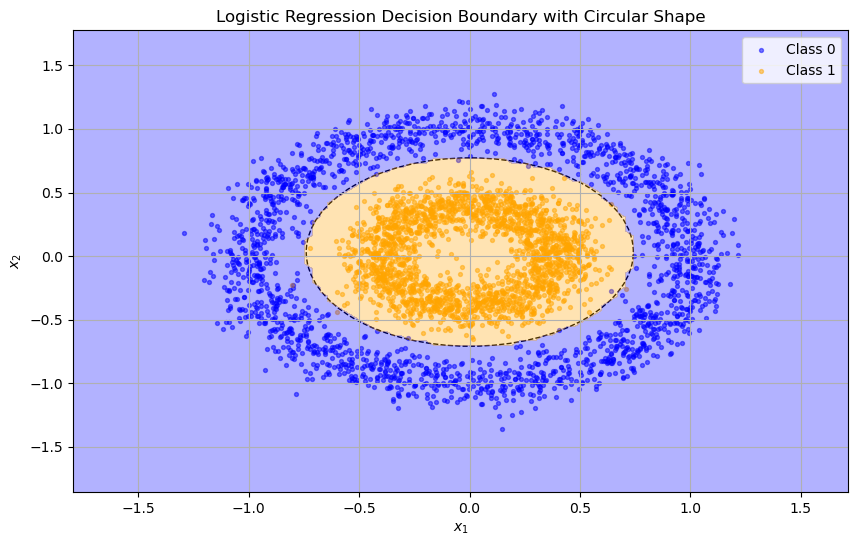

In [26]:

# For the sake of transparency, I did not know how to plot the decision boundary here. I used a bunch of online resources and this is what I got.

def plot_classes_with_circle_boundary(X, y, best_theta):
    plt.figure(figsize=(10, 6))

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], s=8, alpha=0.5, color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], s=8, alpha=0.5, color='orange', label='Class 1')

    theta_0 = best_theta[0]
    theta_1 = best_theta[1]
    theta_2 = best_theta[2]
    theta_3 = best_theta[3]
    theta_4 = best_theta[4]

    h = -theta_1 / (2 * theta_3)
    k = -theta_2 / (2 * theta_4)

    radius_squared = (h**2 + k**2 - theta_0 / theta_3)
    radius = np.sqrt(radius_squared)

    circle = plt.Circle((h, k), radius, color='black', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_artist(circle)

    x_min, x_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    y_min, y_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = ((xx - h)**2 + (yy - k)**2) - radius**2
    Z = np.where(Z <= 0, 1, 0) 

    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=['blue', 'orange'])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')
    plt.title('Logistic Regression Decision Boundary with Circular Shape')
    plt.legend()
    plt.grid()
    plt.show()

plot_classes_with_circle_boundary(X_test, y_test, best_theta)
